In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib_venn import venn3
import matplotlib as mpl
pd.set_option('display.max_rows', 500)
%matplotlib inline

In [2]:
data_path = Path('../great_expectations_data/data')
output_path = Path('../great_expectations_data/cleaned_data')
output_path.mkdir(exist_ok=True)
figure_path = Path('../great_expectations_figures/')
figure_path.mkdir(exist_ok=True)

# Venn diagram

In [3]:
vd = pd.read_csv(data_path/'venn_data.csv')

In [4]:
vd['label'] = vd.apply(lambda row: f'{row.author} ({row.year})', axis=1)

In [35]:
vd.groupby("meta_author").author.count()

meta_author
Keren    38
Ng       41
Zhang    22
Name: author, dtype: int64

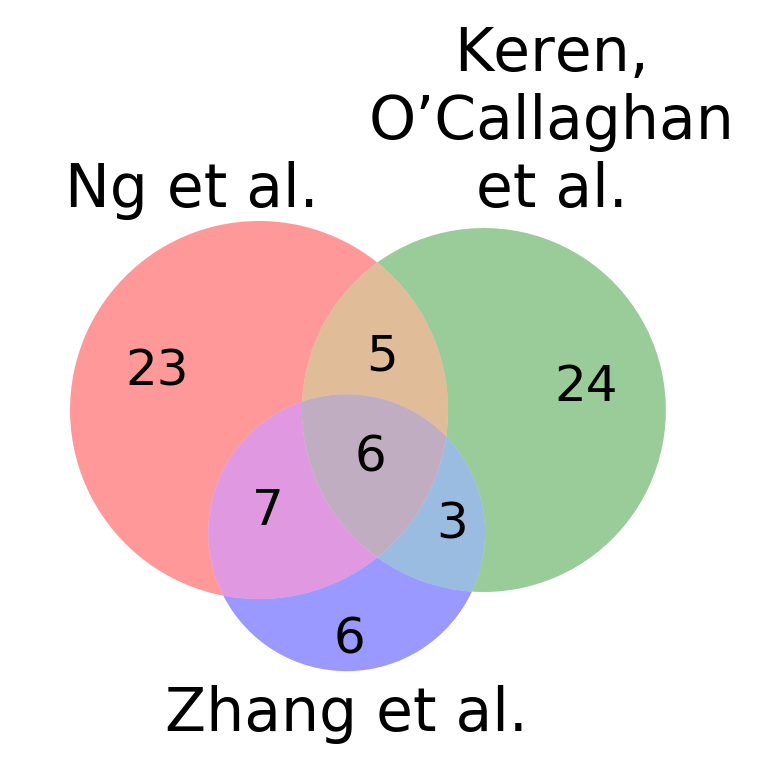

In [36]:
sns.set_context('paper', font_scale=1.5)
fig, ax = plt.subplots(1,  figsize=(3.54,3.54), dpi=250)
v = venn3((set(vd.loc[vd.meta_author=='Ng', 'label']),
       set(vd.loc[vd.meta_author=='Keren', 'label']),
       set(vd.loc[vd.meta_author=='Zhang', 'label'])),
     set_labels=['Ng et al.', 'Keren,\nO’Callaghan\net al.', 'Zhang et al.'],
     ax=ax)
cnc = v.get_circle_center(0)
ln =  v.get_label_by_id('A')
ln.set_x(cnc[0]-0.15)
ln.set_y(0.51)
ln.set_ha('center')

ckc = v.get_circle_center(1)
lk =  v.get_label_by_id('B')
lk.set_x(ckc[0]+0.15)
lk.set_y(0.51)
lk.set_ha('center')
fig.savefig(figure_path / 'meta_venn.png', dpi=300)

In [37]:
vd_sup = vd.groupby(['label'])[['meta_author']].agg(lambda x: (x == 'Zhang').sum()).rename(columns={"meta_author":"Zhang et al."})
vd_sup["Keren, O'Callagahan et al."] = vd.groupby(['label'])[['meta_author']].agg(lambda x: (x == 'Keren').sum())['meta_author']
vd_sup["Ng et al."] = vd.groupby(['label'])[['meta_author']].agg(lambda x: (x == 'Ng').sum())['meta_author']


In [38]:
zhang_only = (vd_sup.sum(1)==1) & (vd_sup['Zhang et al.'] ==1)
vd_sup.loc[zhang_only]

,Zhang et al.,"Keren, O'Callagahan et al.",Ng et al.
label,,,
Canli et al. (2004),1,0,0
Derntl et al. (2011),1,0,0
Epstein et al. (2006),1,0,0
Kumar et al. (2008),1,0,0
McCabe et al. (2009),1,0,0
Mitterschiffthaler et al. (2003),1,0,0


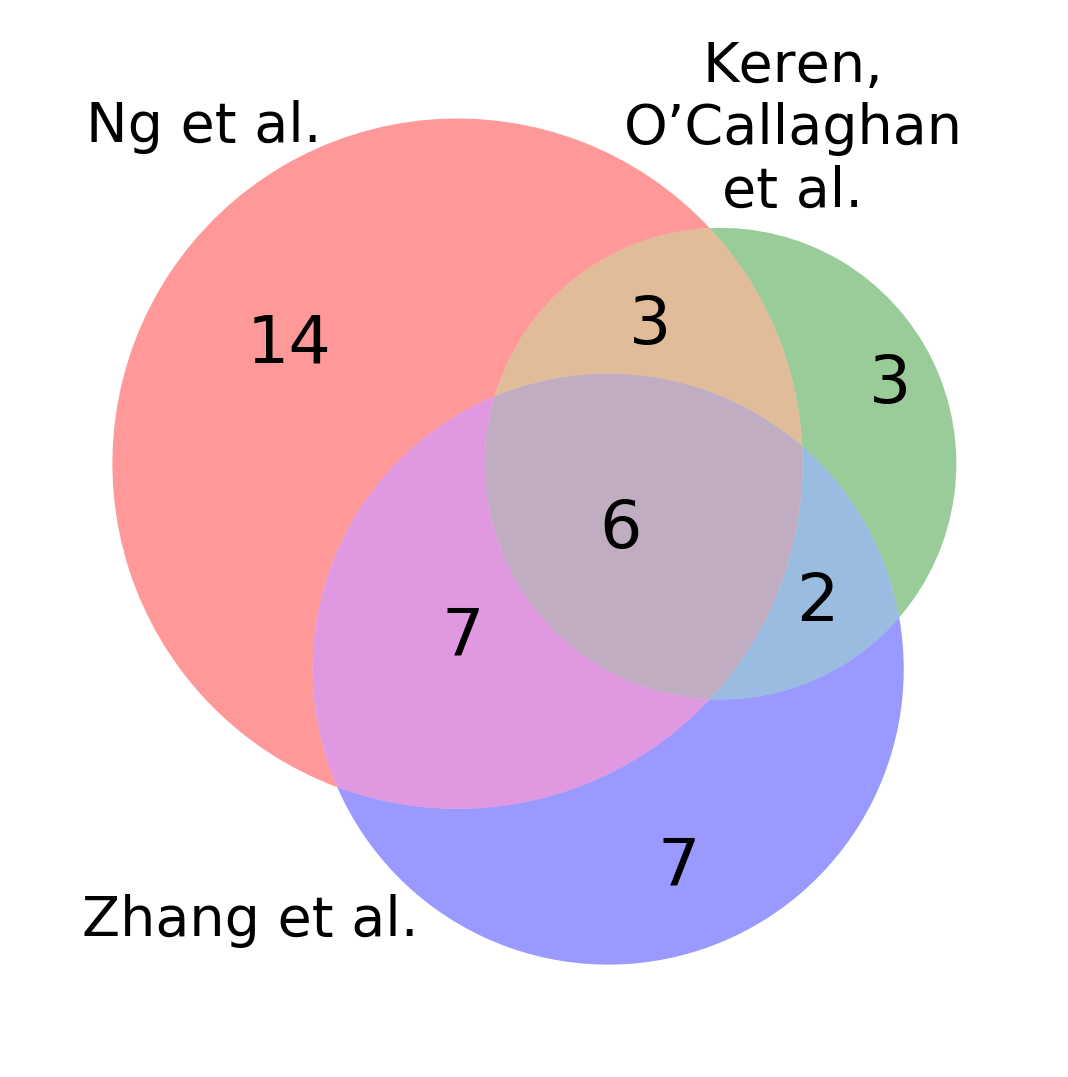

In [86]:
fs = 10
vd = vd.query('used_in_fig == 1')
sns.set_context('paper', font_scale=1.25)
fig, ax = plt.subplots(1,  figsize=(2.9,2.9), dpi=400)
v = venn3((set(vd.loc[vd.meta_author=='Ng', 'label']),
       set(vd.loc[vd.meta_author=='Keren', 'label']),
       set(vd.loc[vd.meta_author=='Zhang', 'label'])),
     set_labels=['Ng et al.', 'Keren,\nO’Callaghan\net al.', 'Zhang et al.'],
     ax=ax)
cnc = v.get_circle_center(0)
ln =  v.get_label_by_id('A')
ln.set_x(cnc[0]-0.35)
ln.set_y(0.54)
ln.set_ha('center')
ln.set_fontsize(fs)

ckc = v.get_circle_center(1)
lk =  v.get_label_by_id('B')
lk.set_x(ckc[0]+0.1)
lk.set_y(0.45)
lk.set_ha('center')
lk.set_fontsize(fs)

lz =  v.get_label_by_id('C')
lz.set_fontsize(fs)
lz.set_x(ckc[0]-0.65)
lz.set_y(-0.5)
fig.tight_layout()
fig.savefig(figure_path / 'meta_venn_used_in_fig.svg')


In [42]:
vd_f1_sup = vd.groupby(['label'])[['meta_author']].agg(lambda x: (x == 'Zhang').sum()).rename(columns={"meta_author":"Zhang et al."})
vd_f1_sup["Keren, O'Callagahan et al."] = vd.groupby(['label'])[['meta_author']].agg(lambda x: (x == 'Keren').sum())['meta_author']
vd_f1_sup["Ng et al."] = vd.groupby(['label'])[['meta_author']].agg(lambda x: (x == 'Ng').sum())['meta_author']


In [44]:
vd_sup

,Zhang et al.,"Keren, O'Callagahan et al.",Ng et al.
label,,,
Admon et al. (2015),0,1,0
Arrondo et al. (2015),0,1,1
Bremner et al. (2007),0,0,1
Burger et al. (2017),0,0,1
Canli et al. (2004),1,0,0
Casement et al. (2016),0,1,0
Chan et al. (2016),0,1,0
Chandrasekhar Pammi et al. (2015),0,1,0
Chantiluke et al. (2012),1,0,1


In [43]:
vd_f1_sup

,Zhang et al.,"Keren, O'Callagahan et al.",Ng et al.
label,,,
Admon et al. (2015),0,1,0
Arrondo et al. (2015),0,0,1
Burger et al. (2017),0,0,1
Canli et al. (2004),1,0,0
Chantiluke et al. (2012),1,0,1
Chase et al. (2013),0,0,1
Demenescu et al. (2011),0,0,1
Derntl et al. (2011),1,0,0
Dichter et al. (2012),1,1,1


In [8]:
vd_sup.to_csv(output_path/'venn_dataset_collapsed.csv')

# Task Trees

In [21]:
kd = pd.read_excel(data_path/'consistency_data.xlsx', sheet_name='keren_fmri_data')
nd = pd.read_excel(data_path/'consistency_data.xlsx', sheet_name='ng_data')
zd = pd.read_excel(data_path/'consistency_data.xlsx', sheet_name='zhang_data')

In [22]:
dd = pd.concat([kd,nd,zd], sort=False, ignore_index=True)
dd['task_contrast'] = dd['task'] + ' ' + dd['ant_or_fb'] + ' ' + dd['contrast']
dd['full_contrast'] = dd['ant_or_fb'] + ' ' + dd['contrast']

In [23]:
task_counts = dd.groupby(['task']).label.nunique().reset_index().sort_values(['label', 'task'])

In [24]:
dd

,label,modality,sample type,reward type,task,ant_or_fb,contrast,direction_of_effect,Task description,task_contrast,full_contrast
0,Admon et al. (2015),fMRI,MDD vs. HV,Monetary,MID,Feedback,reward + loss > neutral,NaN,NaN,MID Feedback reward + loss > neutral,Feedback reward + loss > neutral
1,Arrondo et al. (2015),fMRI,MDD vs. HV,Monetary,MID,Anticipation,reward > neutral,NaN,NaN,MID Anticipation reward > neutral,Anticipation reward > neutral
2,Casement et al. (2016),fMRI,Depression on continuum,Monetary,Card guessing,Anticipation,reward > baseline,NaN,NaN,Card guessing Anticipation reward > baseline,Anticipation reward > baseline
3,Chan et al. (2016),fMRI,HR (high anhedonia score^) vs. HV,Affective,Affective Incentive Delay,Anticipation,reward > neutral,NaN,NaN,Affective Incentive Delay Anticipation reward ...,Anticipation reward > neutral
4,Chandrasekhar Pammi et al. (2015),fMRI,MDD vs. HV,Monetary,Gambling,Anticipation,parametric reward > parametric loss,NaN,NaN,Gambling Anticipation parametric reward > para...,Anticipation parametric reward > parametric loss
5,Chandrasekhar Pammi et al. (2015),fMRI,MDD vs. HV,Monetary,Gambling,Feedback,parametric loss,NaN,NaN,Gambling Feedback parametric loss,Feedback parametric loss
6,Chung & Barch (2015),fMRI,Depression on continuum (anhedonia^) 3,Monetary,Monetary reward paradigm,Anticipation,reward > baseline,NaN,NaN,Monetary reward paradigm Anticipation reward >...,Anticipation reward > baseline
7,Dichter et al. (2012),fMRI,HR vs. HV,Monetary,MID,Anticipation,reward > neutral,NaN,NaN,MID Anticipation reward > neutral,Anticipation reward > neutral
8,Dichter et al. (2012),fMRI,HR vs. HV,Monetary,MID,Feedback,reward > neutral,NaN,NaN,MID Feedback reward > neutral,Feedback reward > neutral
9,Dillon et al. (2014),fMRI,MDD vs. HV,Monetary,Memory,Feedback,reward > neutral,NaN,NaN,Memory Feedback reward > neutral,Feedback reward > neutral


In [25]:
dd.groupby(['task','ant_or_fb', 'contrast']).count()

label  \
task                           ant_or_fb    contrast                                     
Affective Incentive Delay      Anticipation reward > neutral                         1   
Autobiographical memory recall Feedback     reward > neutral                         1   
                                            very negative > negative                 1   
                                            very positive > positive                 1   
Card guessing                  Anticipation reward + loss > baseline                 1   
                                            reward > baseline                        5   
                                            reward > neutral                         1   
                               Feedback     loss > neutral                           1   
                                            prediction error                         1   
                                            reward > baseline                        4   
                                            reward > neutral                         2   
Decision making                Feedback     positive > negative                      1   
EEfRT                          Anticipation high reward > low reward                 1   
Emotional face processing      Feedback     disgust > neutral                        1   
                                            fear > neutral                           1   
                                            happiness intensity                      1   
                                            negative > neutral                       4   
                                            positive > baseline                      1   
                                            positive > neutral                       5   
                                            sadness intensity                        3   
                                            very negative > negative                 1   
Emotional word processing      Feedback     positive > baseline                      1   
                                            positive > neutral                       2   
Face matching                  Feedback     negative > neutral                       2   
Gambling                       Anticipation parametric reward > parametric loss      1   
                               Feedback     parametric loss                          1   
                                            reward > loss                            1   
Go/no go                       Feedback     positive > negative                      1   
                                            reward > neutral                         1   
MID                            Anticipation loss > neutral                           2   
                                            reward > neutral                        10   
                               Both         loss > neutral                           2   
                                            loss > no loss                           1   
                               Feedback     loss > neutral                           1   
                                            reward + loss > neutral                  1   
                                            reward > loss                            1   
                                            reward > neutral                         5   
Memory                         Feedback     reward > neutral                         1   
Monetary reward paradigm       Anticipation high loss > neutral                      1   
                                            high reward > neutral                    1   
                                            reward > baseline                        1   
                                            reward > neutral                         1   
Picture processing             Anticipation negative > neutral                       1   
                               

In [26]:
#multi_tasks = task_counts.loc[task_counts.label > 1, 'task'].values
#uni_tasks = task_counts.loc[task_counts.label == 1, 'task'].values

In [27]:
dd.task.nunique()

19

In [28]:
dd.task_contrast.nunique()

69

In [29]:
#mt_cd = dd.loc[dd.task.isin(multi_tasks), :].groupby(['task','ant_or_fb', 'contrast']).label.nunique().reset_index().sort_values(['label', 'task', 'contrast'], ascending=[False, True, True])

In [30]:
tc_counts = dd.groupby(['task','ant_or_fb', 'contrast']).label.nunique().reset_index().sort_values(['label', 'task', 'contrast'], ascending=[False, True, True])

In [31]:
tc_counts.query('label <= 1').shape

(54, 4)

In [32]:
task_counts

,task,label
0,Affective Incentive Delay,1
1,Autobiographical memory recall,1
3,Decision making,1
4,EEfRT,1
11,Memory,1
15,Self referential processing,1
6,Emotional word processing,2
7,Face matching,2
8,Gambling,2
9,Go/no go,2


In [33]:
task_counts.query("label <= 2").shape

(14, 2)

In [34]:
# ut_cd = dd.loc[~dd.task.isin(multi_tasks), :].groupby(['task','ant_or_fb', 'contrast']).label.nunique().reset_index().sort_values(['label', 'task', 'contrast'], ascending=[False, True, True])
# ut_cd

In [35]:
tc_counts

,task,ant_or_fb,contrast,label
30,MID,Anticipation,reward > neutral,10
5,Card guessing,Anticipation,reward > baseline,5
18,Emotional face processing,Feedback,positive > neutral,5
36,MID,Feedback,reward > neutral,5
43,Picture processing,Feedback,negative > neutral,5
9,Card guessing,Feedback,reward > baseline,4
16,Emotional face processing,Feedback,negative > neutral,4
19,Emotional face processing,Feedback,sadness intensity,3
45,Picture processing,Feedback,positive > neutral,3
10,Card guessing,Feedback,reward > neutral,2


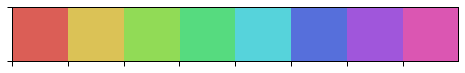

In [42]:
sns.palplot(sns.color_palette("hls", 8))


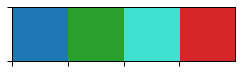

In [98]:
add_cols = [sns.color_palette()[0], sns.color_palette()[2], "#40E0D0", sns.color_palette()[3]]
sns.palplot(add_cols)

In [99]:
colors = {phase:cc for cc,phase in zip(add_cols, tc_counts.ant_or_fb.unique())}


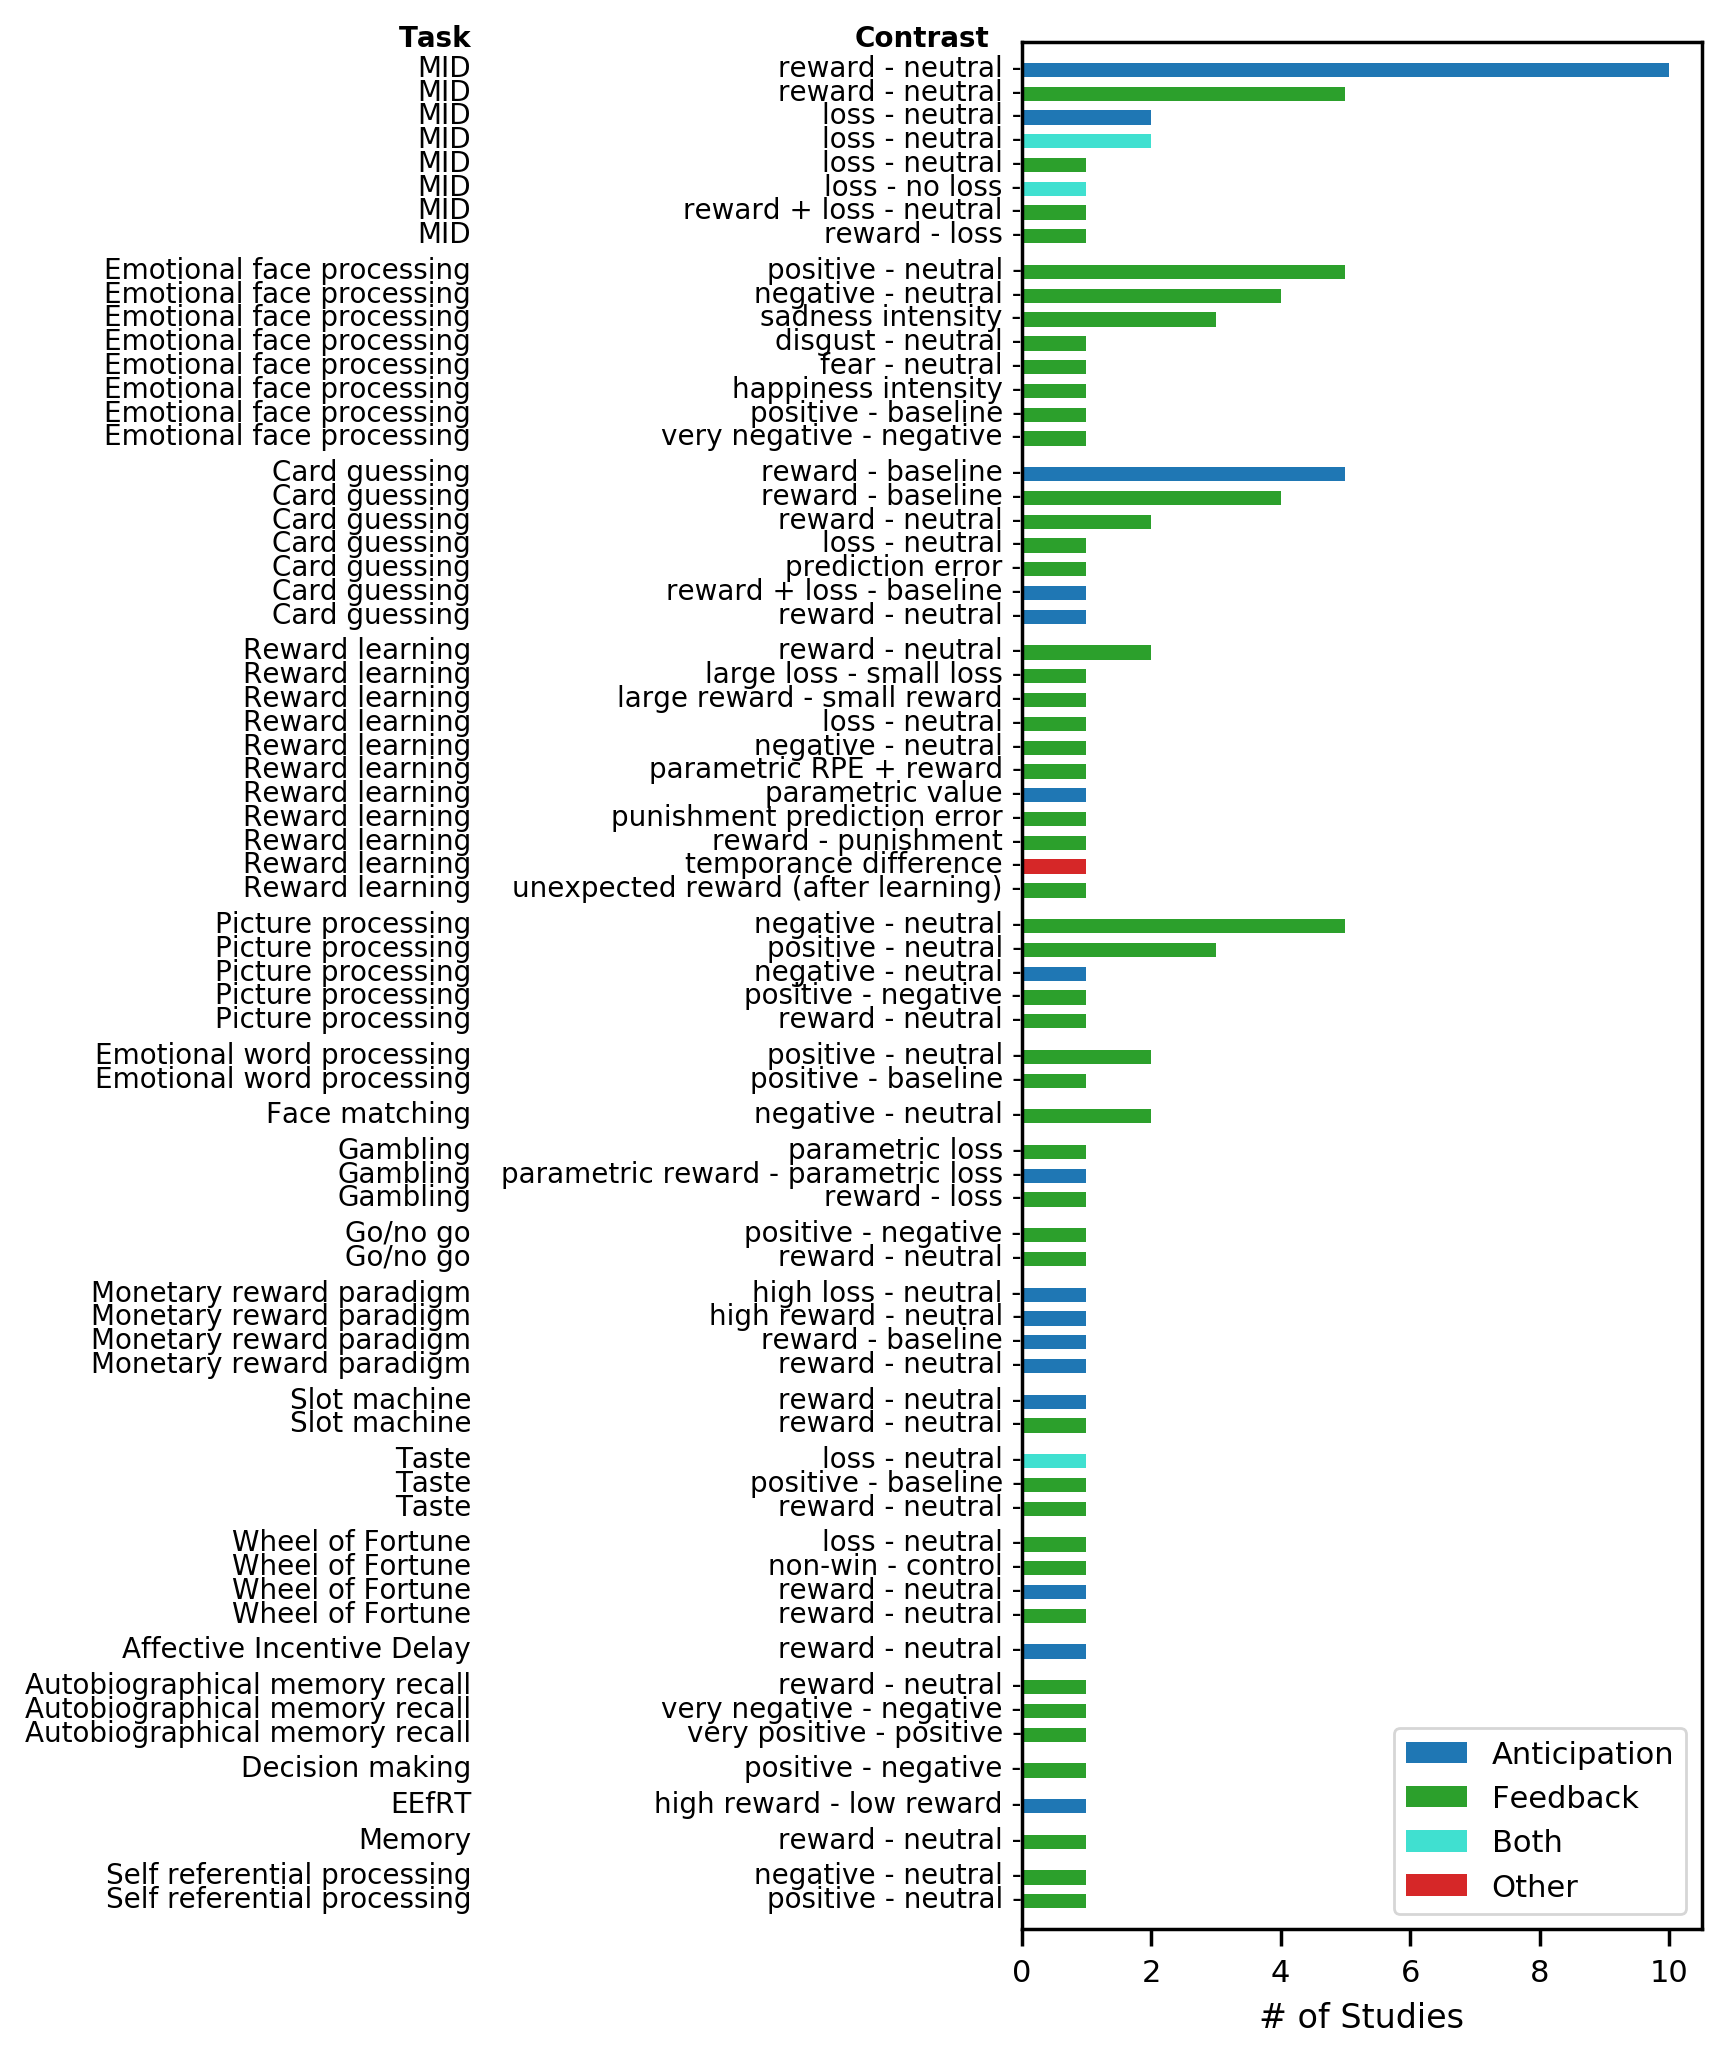

In [100]:

sns.set_context('paper', font_scale=1)
columns = {'task':-8.5, 'contrast':-0.5}
offset = 0.5
fig, ax = plt.subplots(1, figsize=(3.51, 10), dpi=250)
fs = 8
#df = mt_cd.loc[mt_cd.label > 1, :]
#df = mt_cd.copy()
df = tc_counts.copy()
df = df.rename(columns={'label':'N'})
df['label'] = df.apply(lambda row: f'{row.task}: {row.ant_or_fb}, {row.contrast}', axis=1)
df = df.merge(task_counts.rename(columns={'label':'task_N'}), how='left', on='task')
df = df.sort_values(['task_N','task', 'N'], ascending=[False, True, False])

#df = df.append(pd.DataFrame([{'label': 'Tasks used in a single study', 'N': len(ut_cd)}]), sort=False)

df['contrast'] = df.contrast.str.replace (' > ', ' - ')
df = df.reset_index(drop=True).reset_index().rename(columns={'index':'y_pos', 'ant_or_fb':'phase'})
df['y_pos'] = len(df) - df.y_pos

task_offsets = df.groupby('task').first().sort_values('y_pos')
task_offsets['offset'] = np.arange(len(task_counts)) * offset
task_offsets = task_offsets.reset_index().loc[:, ['task', 'offset']]
df = df.merge(task_offsets, how='left', on='task')
df['y_pos'] = df.y_pos + df.offset


#colors = {phase:cc for cc,phase in zip(sns.color_palette(n_colors = len(df.phase.unique())),df.phase.unique())}
df['color'] = df.phase.apply(lambda tt: colors[tt])
ax.barh(df.y_pos, df.N.values, height=0.6, color=df.color.values)
ax.set_yticklabels('')
ax.set_yticks([])
ymin, ymax = ax.get_ylim()
for ix, row in df.iterrows():
        if pd.notnull(row.task):
            ax.text( columns['task'], row.y_pos - 0.25, row.task, ha='right', size=fs)
#         if pd.notnull(row.phase):
#             ax.text( columns['phase'], row.y_pos - 0.25, row.phase, ha='right', size=fs)
        if pd.notnull(row.contrast):
            ax.text( columns['contrast'] + 0.5, row.y_pos - 0.25, row.contrast + ' -', ha='right', size=fs)
#ax.text(0, df.y_pos.values[-1]-0.2, 'Contrasts from tasks used in a single study -', ha='right' )
for cc, cx in columns.items():
        ax.text(cx, df.y_pos.max() +1 , cc.title(), ha='right', weight='bold', size=fs)
ax.set_ylim((ymin+3, ymax-3))
ax.set_xlabel('# of Studies')


faces = []
legend_patches = []
y_pos = []
for cc in ax.get_children():
    if len(faces) == 4:
        break
    if cc.get_facecolor() not in faces:
        faces.append(cc.get_facecolor())
        legend_patches.append(cc)
        y_pos.append(cc.get_y())
        
legend_labels = pd.DataFrame(data=np.array(y_pos) + 0.3, columns=['y_pos']).merge(df.loc[:, ['y_pos', 'phase']]).phase.values
ax.legend(legend_patches, legend_labels)
fig.savefig(figure_path/'consistency.png', dpi=300, bbox_inches='tight')